# Luggage Bag Prediction:
    
    The Dataset attached contains the data of 160 different bags associated with ABC insdustries.
    The bags have certain attributes which are described belo:
    
    Height --> The height of the bag.
    Width  --> The width of the bag.
    Length --> The length of the bag.
    Weight --> The weight of the bag.
    Weight1--> Weight the bag can carry after expansion.
    
    The company now wants to predict the cost they should set for a new variant of these kinds of 
    bags based on the attributes above. As a result, they want to build a model which can correctly
    set the cost of bag provided the attributes are given,The task invloves following things,

# Import the Relevant Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Applying all the styles
sns.set_style()

# Load the Data

In [3]:
raw_data = pd.read_csv("Downloads\\Data_miniproject.csv")
raw_data.head()

,Cost,Weight,Weight1,Length,Height,Width
0,242.0,23.2,25.4,30.0,11.5200,4.0200
1,290.0,24.0,26.3,31.2,12.4800,4.3056
2,340.0,23.9,26.5,31.1,12.3778,4.6961
3,363.0,26.3,29.0,33.5,12.7300,4.4555
4,430.0,26.5,29.0,34.0,12.4440,5.1340


# Statistical Description of Data

In [4]:
raw_data.describe(include='all')

,Cost,Weight,Weight1,Length,Height,Width
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,398.326415,26.247170,28.415723,31.227044,8.970994,4.417486
std,357.978317,9.996441,10.716328,11.610246,4.286208,1.685804
min,0.000000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,120.000000,19.050000,21.000000,23.150000,5.944800,3.385650
50%,273.000000,25.200000,27.300000,29.400000,7.786000,4.248500
75%,650.000000,32.700000,35.500000,39.650000,12.365900,5.584500
max,1650.000000,59.000000,63.400000,68.000000,18.957000,8.142000


Here we can observe that in column 'Cost' the minimum value 0 which represents a null value, so we can fill that particular row  with  value of 'mean cost'

In [5]:
raw_data['Cost'].iloc[40] = np.mean(raw_data['Cost'])

In [6]:
raw_data['Cost'].iloc[40]

398.3264150943396

In [7]:
raw_data.describe()

,Cost,Weight,Weight1,Length,Height,Width
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,400.831613,26.247170,28.415723,31.227044,8.970994,4.417486
std,356.564100,9.996441,10.716328,11.610246,4.286208,1.685804
min,5.900000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,122.500000,19.050000,21.000000,23.150000,5.944800,3.385650
50%,290.000000,25.200000,27.300000,29.400000,7.786000,4.248500
75%,650.000000,32.700000,35.500000,39.650000,12.365900,5.584500
max,1650.000000,59.000000,63.400000,68.000000,18.957000,8.142000


In [8]:
raw_data.isnull().sum()

Cost       0
Weight     0
Weight1    0
Length     0
Height     0
Width      0
dtype: int64

Now we are having no null values into our Data. 

# Exploratory Data Analysis

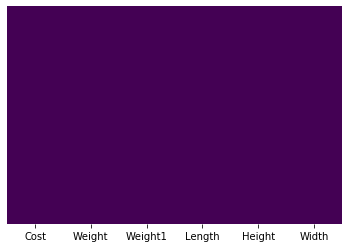

In [9]:
sns.heatmap(raw_data.isnull(),yticklabels=False,cbar=False,cmap='viridis') 

Cleary as we can see our data is not having any null or NaN values in any of the column.

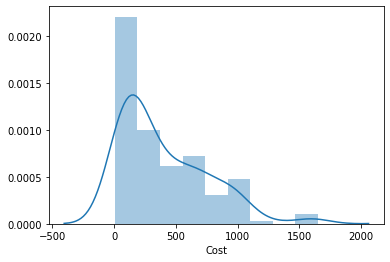

In [10]:
sns.distplot(raw_data['Cost'])

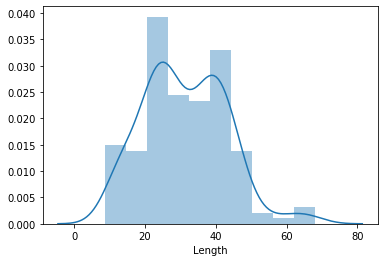

In [11]:
sns.distplot(raw_data['Length'])

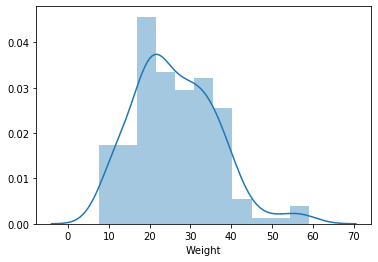

In [12]:
sns.distplot(raw_data['Weight'])

# Correlation Between  different data points

In [13]:
#Correlation of all the columns 
raw_data.corr()

,Cost,Weight,Weight1,Length,Height,Width
Cost,1.000000,0.914218,0.917039,0.921573,0.723101,0.885552
Weight,0.914218,1.000000,0.999517,0.992031,0.625378,0.867050
Weight1,0.917039,0.999517,1.000000,0.994103,0.640441,0.873547
Length,0.921573,0.992031,0.994103,1.000000,0.703409,0.878520
Height,0.723101,0.625378,0.640441,0.703409,1.000000,0.792881
Width,0.885552,0.867050,0.873547,0.878520,0.792881,1.000000


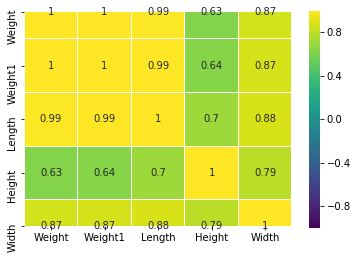

In [17]:
# plotting significant correlation in one plot (heatmap)

corr = raw_data.drop('Cost',axis = 1).corr()
sns.heatmap(corr[(corr >= 0.5)|(corr<= -0.4)],
           cmap = 'viridis', vmax = 1.0 , vmin = -1.0, linewidth = 0.1,
           annot = True, square = True)

The above heatmap defines the correlation between features with the target cost

C:\Users\hp\Anaconda3\lib\site-packages\numpy\core\_methods.py:140: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
C:\Users\hp\Anaconda3\lib\site-packages\numpy\core\_methods.py:132: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\hp\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\hp\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


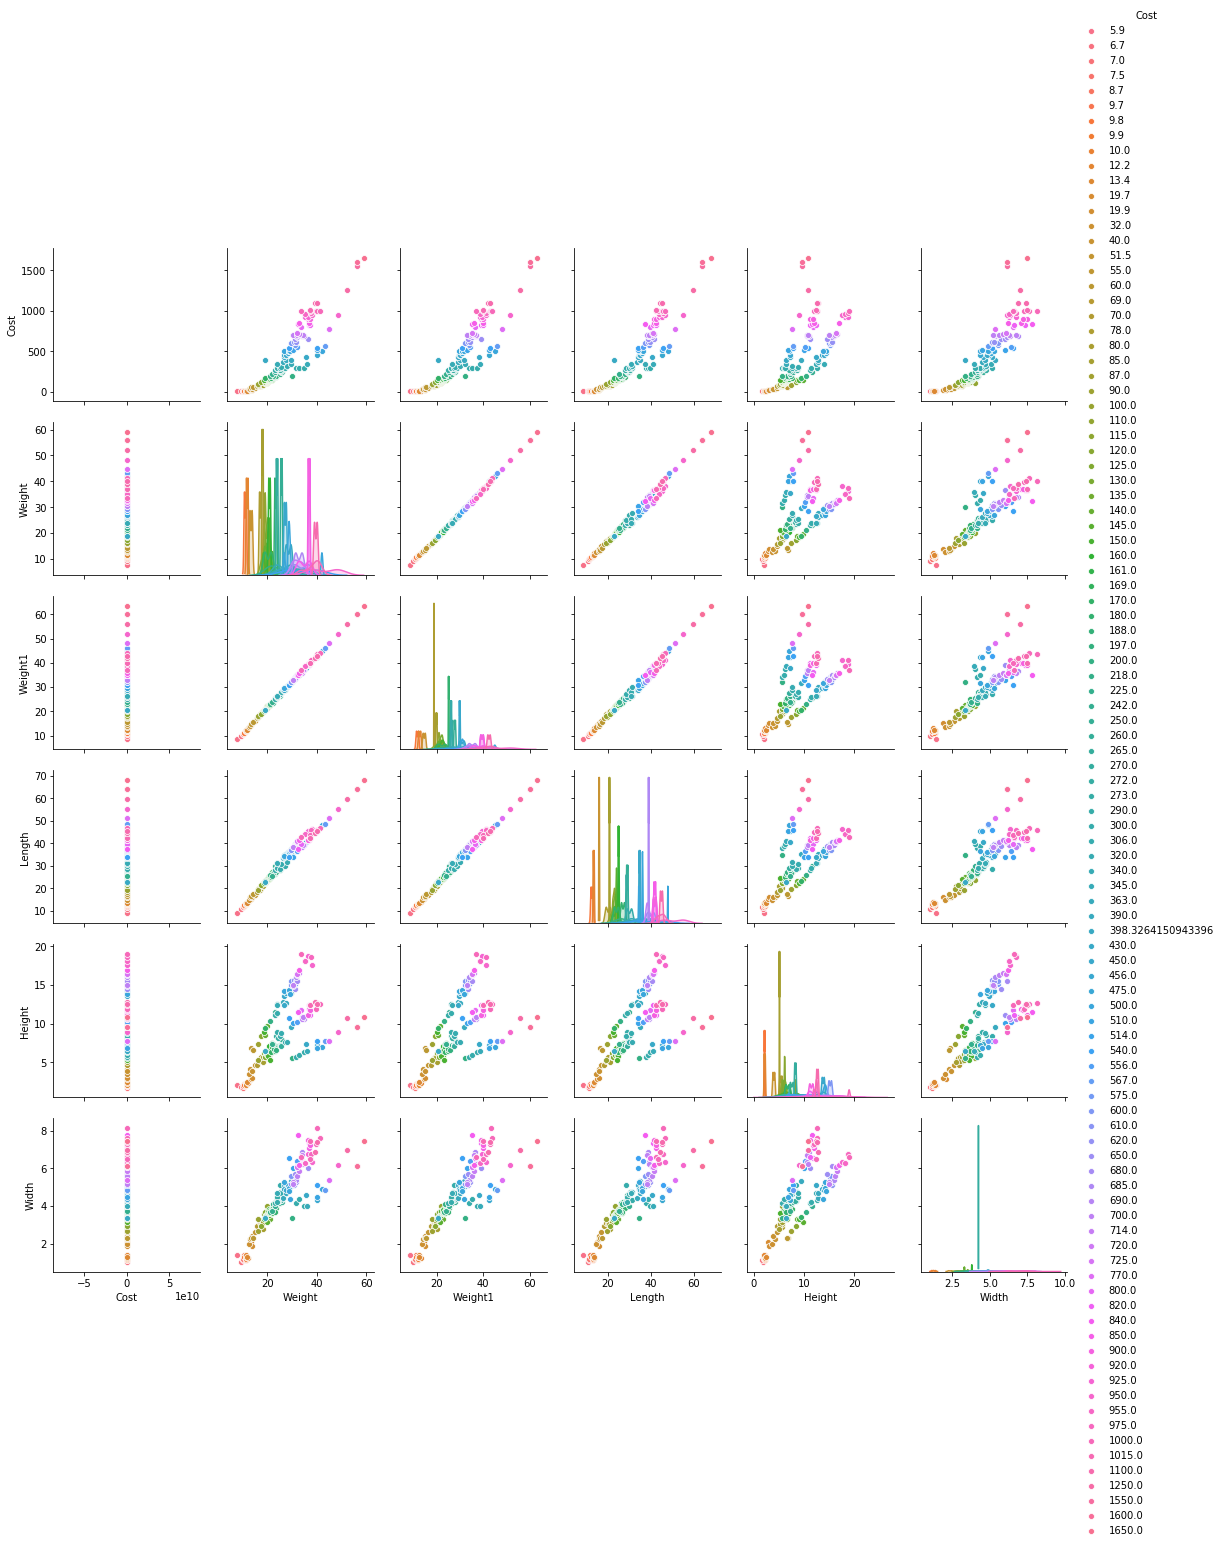

In [13]:
sns.pairplot(raw_data, hue='Cost',palette='husl')

Above graphs are the all columns comparision with hue 'Cost' Column

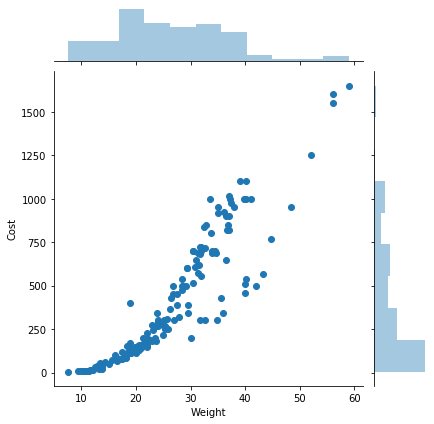

In [95]:
sns.jointplot(x = raw_data['Weight'], y = raw_data['Cost'])

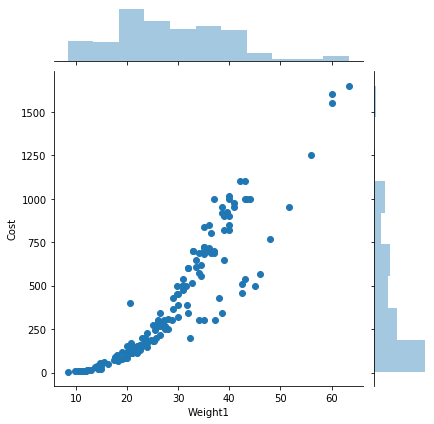

In [97]:
sns.jointplot(x = raw_data['Weight1'], y = raw_data['Cost'])

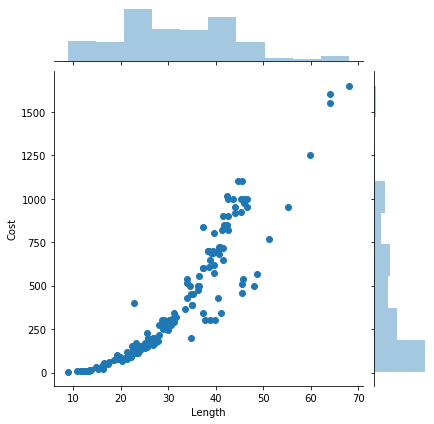

In [98]:
sns.jointplot(x = raw_data['Length'], y = raw_data['Cost'])

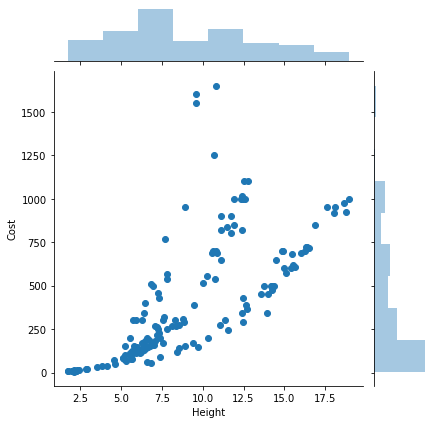

In [99]:
sns.jointplot(x = raw_data['Height'], y = raw_data['Cost'])

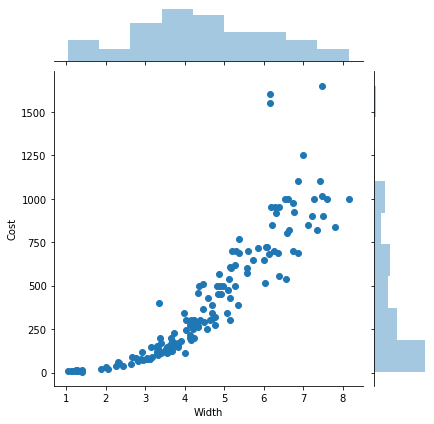

In [100]:
sns.jointplot(x=raw_data['Width'], y= raw_data['Cost'])

# OLS Assumptions

## Linearity

Performing Log on the dataset not only provide standard natural log values, Taking logs pulls in the residuals for the bigger values

In [101]:
log_data = np.log(raw_data)

In [102]:
log_data.head()

,Cost,Weight,Weight1,Length,Height,Width
0,5.488938,3.144152,3.234749,3.401197,2.444085,1.391282
1,5.669881,3.178054,3.269569,3.440418,2.524127,1.459917
2,5.828946,3.173878,3.277145,3.437208,2.515905,1.546732
3,5.894403,3.269569,3.367296,3.511545,2.543961,1.494139
4,6.063785,3.277145,3.367296,3.526361,2.521239,1.635885


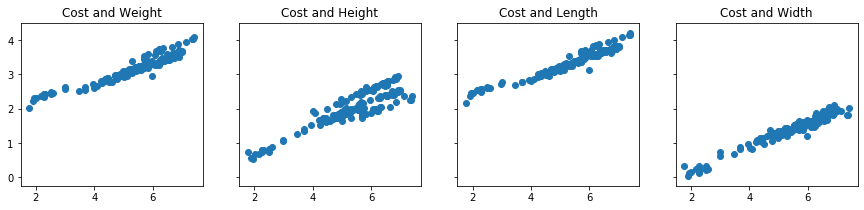

In [103]:
f,(ax1, ax2, ax3, ax4) = plt.subplots(1,4,sharey=True,figsize=(15,3))
ax1.scatter(log_data['Cost'],log_data['Weight'])
ax1.set_title('Cost and Weight')
ax2.scatter(log_data['Cost'],log_data['Height'])
ax2.set_title('Cost and Height')
ax3.scatter(log_data['Cost'],log_data['Length'])
ax3.set_title('Cost and Length')
ax4.scatter(log_data['Cost'], log_data['Width'])
ax4.set_title('Cost and Width')

plt.show()

we can clearly see that the 'Cost' target variable is linear with all the features, we can perform Multiple Regression on the given dataset

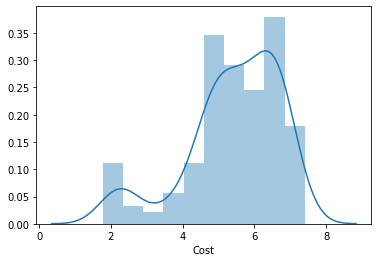

In [104]:
sns.distplot(log_data['Cost'])

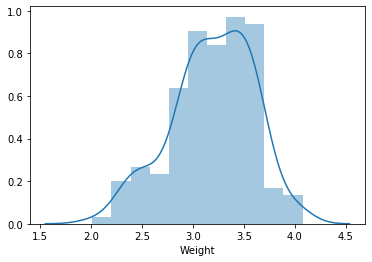

In [105]:
sns.distplot(log_data['Weight'])

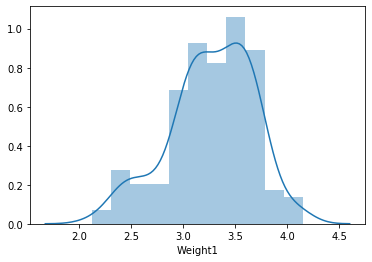

In [106]:
sns.distplot(log_data['Weight1'])

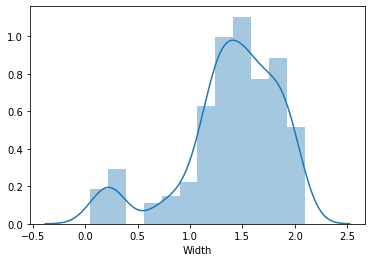

In [107]:
sns.distplot(log_data['Width'])

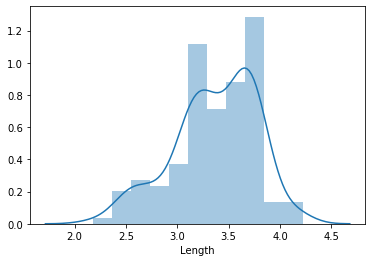

In [108]:
sns.distplot(log_data['Length'])

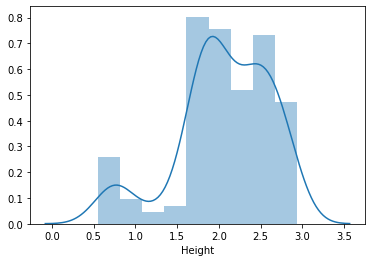

In [28]:
sns.distplot(log_data['Height'])

From the above graphs we can say that data is normally distributed and we can perfrom Linear Regression

# Feature Selection

In [109]:
x = log_data.drop(log_data[['Cost','Weight1']], axis=1)
y = log_data['Cost']

In [110]:
#These are the Independent Variable
x.columns

Index(['Weight', 'Length', 'Height', 'Width'], dtype='object')

## AutoCorrelation

 The data is not a time series or panel data so no autocorrelation

## Normality and Homoscedasticity

We already applied log transformation which is the common fix.

## No Endogenity

We will discuss the residuals after the regression is created. This problem occurs when we ommit the variable or forget to include the variable

# Multicollinearity

In [76]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables =raw_data[["Weight","Weight1","Length","Height","Width"]]
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(variables.values,i)for i in range(variables.shape[1])]
vif["features"] = variables.columns

#printing vif
vif

,VIF,features
0,12782.535830,Weight
1,16598.744318,Weight1
2,3380.815907,Length
3,76.064364,Height
4,92.658672,Width


# Regression and Predictions

# Splitting Data into Training and Testing Datasets

In [111]:
from sklearn.model_selection import train_test_split

In [112]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=365)

In [119]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)



(127, 4)
(32, 4)
(127,)
(32,)


# Fitting LinearRegression to our Data

In [120]:
from sklearn.linear_model import LinearRegression

In [121]:
model = LinearRegression()

model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [122]:
#Making Predictions

prediction = model.predict(X_test)

In [123]:
prediction

array([5.15661112, 4.75801772, 6.70684689, 5.84023419, 5.7052737 ,
       2.37571947, 6.31040319, 6.88042634, 5.25613418, 4.46228227,
       6.56949081, 5.29866168, 5.01696332, 5.79265246, 2.34405062,
       6.12519753, 3.699802  , 6.3685267 , 5.10333688, 6.17463041,
       4.92444166, 3.30935641, 4.81668345, 5.67538653, 3.29333203,
       6.64875894, 6.63466148, 6.55687373, 6.53738998, 6.05412711,
       6.64642033, 5.10290564])

In [125]:
#Getting the actual values by performing exponential 

preds = np.exp(prediction)
preds

array([173.57523252, 116.51473166, 817.98736498, 343.85985959,
       300.44770106,  10.75875096, 550.26676491, 973.04111567,
       191.73882859,  86.68512245, 713.00669533, 200.06887482,
       150.95221359, 327.88156344,  10.42337229, 457.2350203 ,
        40.43929677, 583.1979679 , 164.57014302, 480.40543809,
       137.6124862 ,  27.36750635, 123.55463587, 291.60102872,
        26.93245407, 771.82585189, 761.02140431, 704.06714982,
       690.48204998, 425.86700984, 770.02295727, 164.49918883])

In [131]:
new_data = pd.DataFrame(preds, columns=['Predictions'])

In [152]:
new_data

,Predictions
0,173.575233
1,116.514732
2,817.987365
3,343.859860
4,300.447701
5,10.758751
6,550.266765
7,973.041116
8,191.738829
9,86.685122


These are our Predictions for a luggage bag corresponding to their features for training set

# Calculate the R-Squared

In [144]:
model.score(X_train, y_train)

0.9883058411261382

We got the best R-squared value bigger the R-square better our model

# Calculating MAE, MSE and RMSE

In [153]:
from sklearn.metrics import mean_absolute_error, mean_squared_error


In [160]:
print("MAE: "+str(mean_absolute_error(new_data['Predictions'],y_test)))
print("MSE: "+str(mean_squared_error(new_data['Predictions'],y_test)))
print("RMSE: "+str(np.sqrt(mean_squared_error(new_data['Predictions'],y_test))))


MAE: 18.365171295389374
MSE: 947.6560184785315
RMSE: 30.784022129645948


# Model Summary using statmodels

In [174]:
import statsmodels.api as sm

x = log_data.drop(log_data[['Weight1','Cost','Length']], axis=1)

y = log_data['Cost']

In [188]:
x1 = sm.add_constant(x)

model = sm.OLS(y,x1).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Cost   R-squared:                       0.989
Model:                            OLS   Adj. R-squared:                  0.989
Method:                 Least Squares   F-statistic:                     4707.
Date:                Sat, 02 May 2020   Prob (F-statistic):          5.80e-152
Time:                        14:33:52   Log-Likelihood:                 89.993
No. Observations:                 159   AIC:                            -172.0
Df Residuals:                     155   BIC:                            -159.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.6865      0.161    -10.462      0.000      -2.005      -1.368
Weight         1.3967      0.072     19.286      0.000       1.254       1.540
Height         0.6266      0.046     13.531      0.000       0.535       0.718
Width          0.9713      0.087     11.172      0.000       0.800       1.143
==============================================================================
Omnibus:                      182.911   Durbin-Watson:                   1.844
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             9535.473
Skew:                           4.116   Prob(JB):                         0.00
Kurtosis:                      40.034   Cond. No.                         73.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

We will remove the 'Weight1' and 'Length' features as their p-values are greater than considered p-value that is .005 

In [193]:
prediction = model.predict(x1)

In [194]:
prediction = np.exp(p)

In [195]:
prediction

0      265.834407
1      313.100270
2      336.292347
3      373.435343
4      425.132276
          ...    
154     12.260057
155     12.686335
156     12.641997
157     26.643083
158     26.137795
Length: 159, dtype: float64

In [196]:
new_frame = pd.DataFrame(prediction,columns=['Model_Predict'])
new_frame.head()

,Model_Predict
0,265.834407
1,313.100270
2,336.292347
3,373.435343
4,425.132276


In [197]:
new_frame['Actual Cost'] = raw_data['Cost']

In [198]:
new_frame

,Model_Predict,Actual Cost
0,265.834407,242.0
1,313.100270,290.0
2,336.292347,340.0
3,373.435343,363.0
4,425.132276,430.0
...,...,...
154,12.260057,12.2
155,12.686335,13.4
156,12.641997,12.2
157,26.643083,19.7


These are the actual cost values and Prediction cost values

In [199]:
x_new = new_frame['Model_Predict']
y_new = new_frame['Actual Cost']

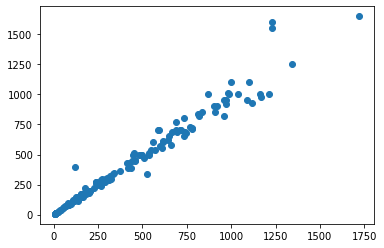

In [200]:
plt.scatter(x_new,y_new)

We can observe that Linear relationship between the 'Actual Cost' and 'Model_Predict' predictions made by our model 